In [67]:
import face_recognition
import pickle
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("labels_utf8.csv")
failed_images = list()
failed_race = list()
failed_sex = list()

for name in tqdm(df['ID']):
    if len(face_recognition.face_encodings(face_recognition.load_image_file(f"/Users/nathaniel/Downloads/mugshots/front/front/{name}"))) == 0:
        failed_person = df[df['ID'] == name]
        failed_images.append(name)
        failed_race.append(failed_person['Race'].iloc[0])
        failed_sex.append(failed_person['Sex'].iloc[0])

100%|██████████| 69827/69827 [2:14:15<00:00,  8.67it/s]   


TypeError: dump() missing required argument 'file' (pos 2)

In [19]:
with open("failed_names", 'wb') as f:
    pickle.dump(failed_images, f)
with open("failed_race", 'wb') as f:
    pickle.dump(failed_race, f)
with open("failed_sex", 'wb') as f:
    pickle.dump(failed_sex, f)

In [47]:
def ez_plot(x:list, bars:dict, x_label:str = None, y_label:str = None, title:str = None):
    X_axis = np.arange(len(x))
    width = 0.4
    num_bars = len(bars)
    i = 1
    
    for key, value in bars.items():
        plt.bar(X_axis + width/2*num_bars - width/2*i, value, width, label = key)
        i+=2

    plt.xticks(X_axis, x)
    if x_label is not None and type(x_label) is str:
        plt.xlabel(x_label)
    if y_label is not None and type(y_label) is str:
        plt.ylabel(y_label)
    if title is not None and type(title) is str:
        plt.title(title)
    plt.legend()
    plt.show()

In [59]:
df.head()

,ID,Sex,Height,Weight,Hair,Eyes,Race,Sex Offender,Offense
0,A00147,Male,5 ft. 07 in.,185 lbs.,Brown,Blue,White,True,"AGGR KIDNAPPING-NO RANSOM, ATTEMPT MURDER/INTE..."
1,A00198,Male,6 ft. 02 in.,190 lbs.,Red or Auburn,Brown,White,False,"CRIM DMG TO PROP $300-10K, ATTEMPT AGG BATTERY..."
2,A00360,Male,5 ft. 09 in.,167 lbs.,Gray or Partially Gray,Green,White,False,"ARMED ROBBERY, OBSTRUCTING JUSTICE, CARRY/POSS..."
3,A00367,Male,6 ft. 00 in.,245 lbs.,Black,Brown,Black,False,"THEFT CONTROL INTENT 10K, RET THEFT/DISP MERCH..."
4,A01054,Male,5 ft. 07 in.,166 lbs.,Salt and Pepper,Brown,Black,True,"AGG CRIM SEX ASSAULT/WEAPON, ARMED ROBBERY, AG..."


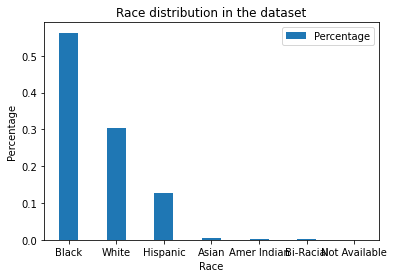

In [57]:
X = df['Race'].value_counts().index
Y = df['Race'].value_counts().values
Y = Y/sum(Y)
ez_plot(X, {'Percentage': Y}, "Race", "Percentage", "Race distribution in the dataset")

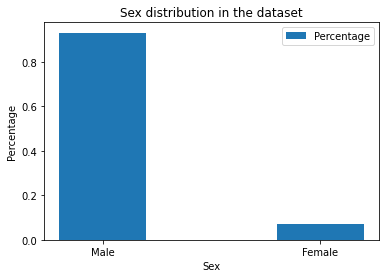

In [58]:
X = df['Sex'].value_counts().index
Y = df['Sex'].value_counts().values
Y = Y/sum(Y)
ez_plot(X, {'Percentage': Y}, "Sex", "Percentage", "Sex distribution in the dataset")

In [13]:
fr.value_counts()

Black    120
White     15
dtype: int64

In [14]:
fs = pd.Series(failed_sex)

In [15]:
fs.value_counts()

Male      134
Female      1
dtype: int64

In [17]:
df['Race'].value_counts()

Black            39282
White            21158
Hispanic          8910
Asian              256
Amer Indian        102
Bi-Racial           82
Not Available       37
Name: Race, dtype: int64

In [18]:
df['Sex'].value_counts()

Male      64944
Female     4883
Name: Sex, dtype: int64

In [33]:
num_unrecognized_black = len(fr[fr=='Black'])
print(f"Percentage of unrecognized faces that were African American: {num_unrecognized_black/len(fr)}")

Percentage of unrecognized faces that were African American: 0.8888888888888888


In [34]:
races = df['Race']
num_black = len(races[races=='Black'])
print(f"Percentage of faces in the dataset that were African American: {num_black/len(races)}")

Percentage of faces in the dataset that were African American: 0.5625617597777364


In [35]:
print(f"Percentage of African American faces recognized: {(num_black - num_unrecognized_black)/num_black}")

Percentage of African American faces recognized: 0.9969451657247594


In [36]:
num_unrecognized_white = len(fr[fr=='White'])
print(f"Percentage of unrecognized faces that were White: {num_unrecognized_white/len(fr)}")

Percentage of unrecognized faces that were White: 0.1111111111111111


In [37]:
num_white = len(races[races=='White'])
print(f"Percentage of faces in the dataset that were White: {num_white/len(races)}")

Percentage of faces in the dataset that were White: 0.3030060005442021


In [38]:
print(f"Percentage of White faces recognized: {(num_white - num_unrecognized_white)/num_white}")

Percentage of White faces recognized: 0.9992910483032422


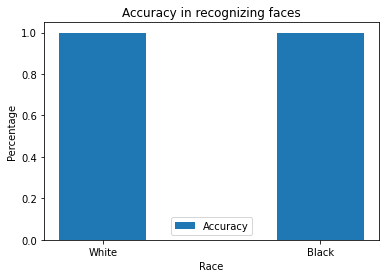

In [45]:
X = ['White', 'Black']
Y = [(num_white - num_unrecognized_white)/num_white, (num_black - num_unrecognized_black)/num_black]
ez_plot(X, {'Accuracy': Y}, "Race", "Percentage", "Accuracy in recognizing faces")

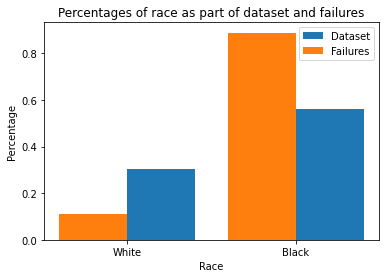

In [48]:
X = ['White', 'Black']
Y = [num_white/len(races), num_black/len(races)]
Z = [num_unrecognized_white/len(fr), num_unrecognized_black/len(fr)]

ez_plot(X, {'Dataset': Y, 'Failures': Z}, "Race", "Percentage", "Percentages of race as part of dataset and failures")

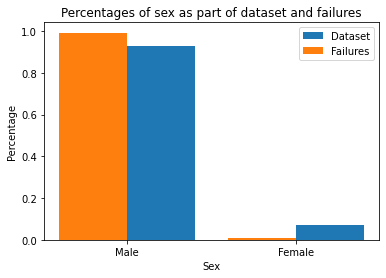

In [61]:
X = fs.value_counts().index
Y = fs.value_counts().values
Y = Y/sum(Y)
Z = df['Sex'].value_counts().values
Z = Z/sum(Z)

ez_plot(X, {'Dataset': Z, 'Failures': Y}, "Sex", "Percentage", "Percentages of sex as part of dataset and failures")

In [66]:
fs[fs=='Female']

122    Female
dtype: object

In [65]:
fr[122]

'Black'

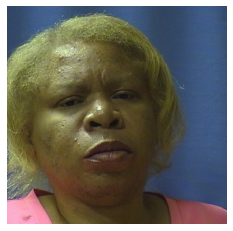

In [69]:
img = mpimg.imread(f"/Users/nathaniel/Downloads/mugshots/front/front/{failed_images[122]}")
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [70]:
fs[fs=='Male']

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
130    Male
131    Male
132    Male
133    Male
134    Male
Length: 134, dtype: object

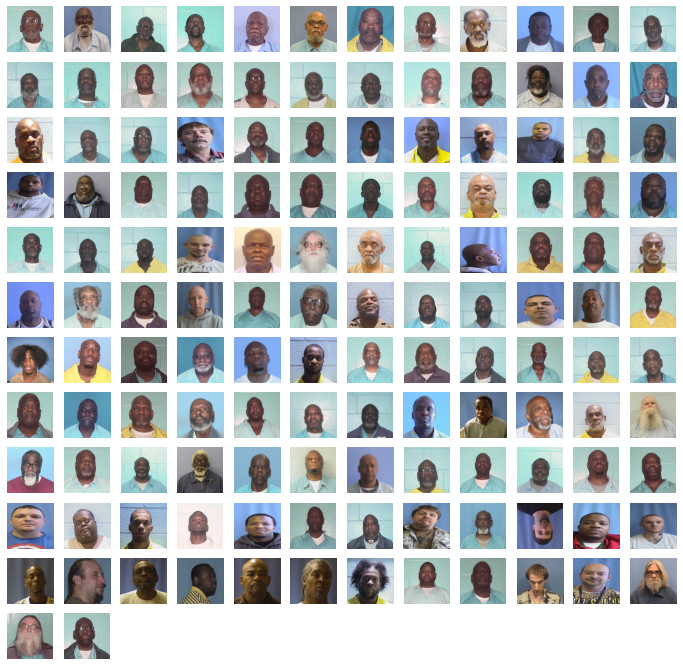

In [77]:
n = 1

fig = plt.figure(figsize=(12, 12))

for i in fs[fs=='Male'].index:
    fig.add_subplot(12, 12, n)
    plt.imshow(mpimg.imread(f"/Users/nathaniel/Downloads/mugshots/front/front/{failed_images[i]}"))
    plt.axis('off')
    n += 1